In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
data = pd.read_csv('../pro-test/data/Leb_1_drop_non_impact_params.csv', index_col=0)
data.head(5)

,nameofevent,startdate,endate,ongoing,timeofprotest,governorate,district,location,gpslatend,gpslongend,...,militiarepress,partyrepress,militia or party,employerrepress,eventcancelled,cancelreason,otherrepress,killed,injured,arrested
recordnumber,,,,,,,,,,,,,,,,,,,,,
20191592,Thawra,2019-11-26,2019-11-26,0,0,Beirut,Beirut,BDL - Hamra,33.895739,35.488961,...,0,0,0,0,0,NaN,0,0,0,0
20200162,Thawra,2020-01-13,2020-01-13,0,0,North,Tripoli,Abi Samra - Tripoli,34.425973,35.842369,...,0,0,0,0,0,NaN,0,0,0,0
20191864,Al Asir detainees,2019-12-06,2019-12-06,0,0,South,Sidon,Maksar Al Abed roundabout,33.566481,35.405984,...,0,0,0,0,0,NaN,0,0,0,0
20200903,Thawra,2020-03-27,2020-03-27,0,0,South,Sidon,Eliya square,33.562139,35.379648,...,0,0,0,0,0,NaN,0,0,0,0
20200891,Thawra,2020-03-20,2020-03-20,0,0,South,Sidon,Municipality of Sidon,33.564317,35.375296,...,0,0,0,0,0,NaN,0,0,0,0


In [40]:
%matplotlib inline
sns.set(rc={'figure.figsize':(12,6)})
def future_plot(column, drop_non_violence=False):
    ''' create a dataframe of 2 columns only'''
    df = data[[column,'repression']].reset_index().drop(columns='recordnumber')
    
    '''groupby the column'''
    grouped_df = pd.DataFrame(df.groupby(column)['repression'].value_counts().unstack())
    grouped_df = grouped_df.iloc[:, [4,7,5,0,6,1,2]]
    if drop_non_violence == True:
        non_violence = grouped_df.drop(columns='No known coercion, no security presence')
        return non_violence.plot(kind='bar');
    else:
        return grouped_df.plot(kind='bar');

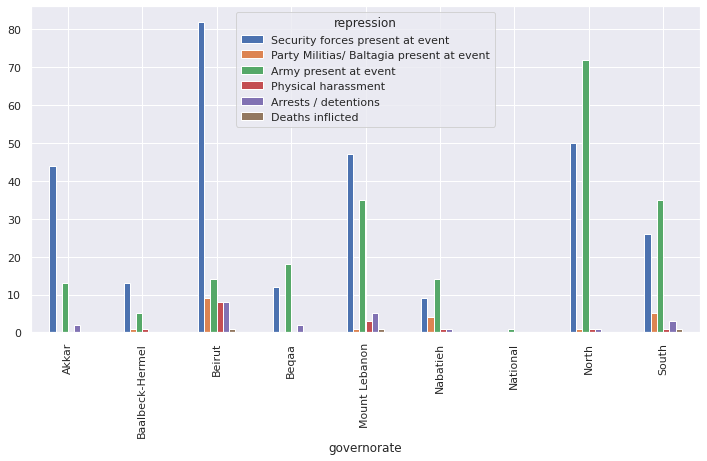

In [41]:
future_plot('governorate', drop_non_violence=True)
plt.savefig('../plots/leb_plots/gov_repress.png')

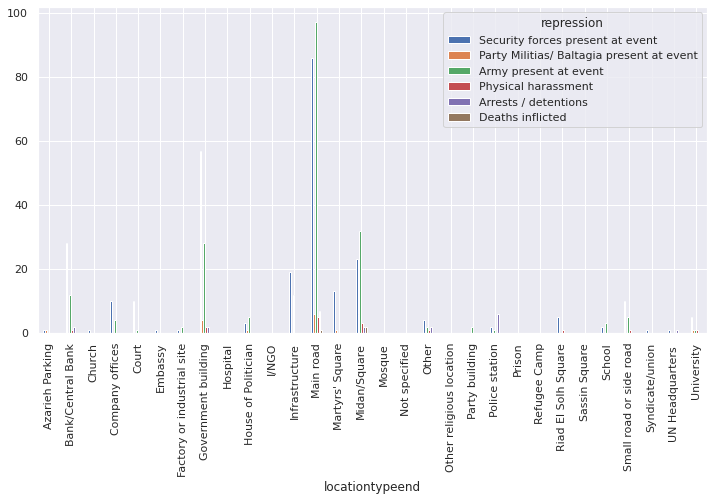

In [42]:
future_plot('locationtypeend', drop_non_violence=True)
plt.savefig('../plots/leb_plots/location_type_repress.png')

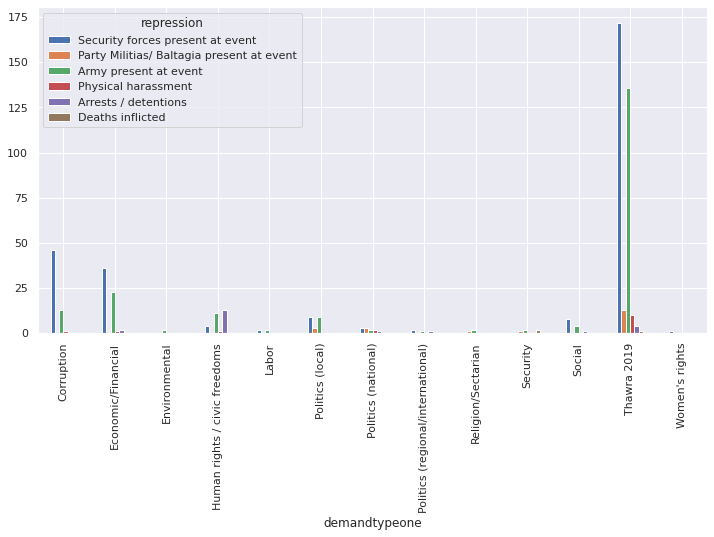

In [43]:
future_plot('demandtypeone', drop_non_violence=True)
plt.savefig('../plots/leb_plots/demand_repress.png')

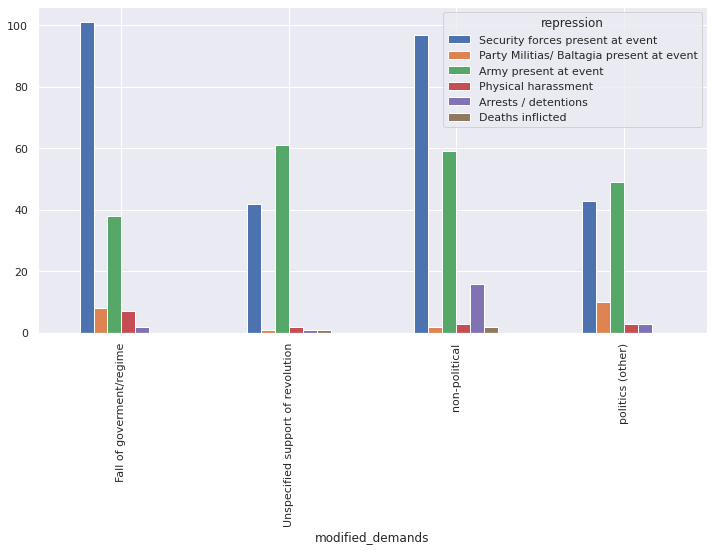

In [44]:
future_plot('modified_demands', drop_non_violence=True)
plt.savefig('../plots/leb_plots/demand_modified_repress.png')

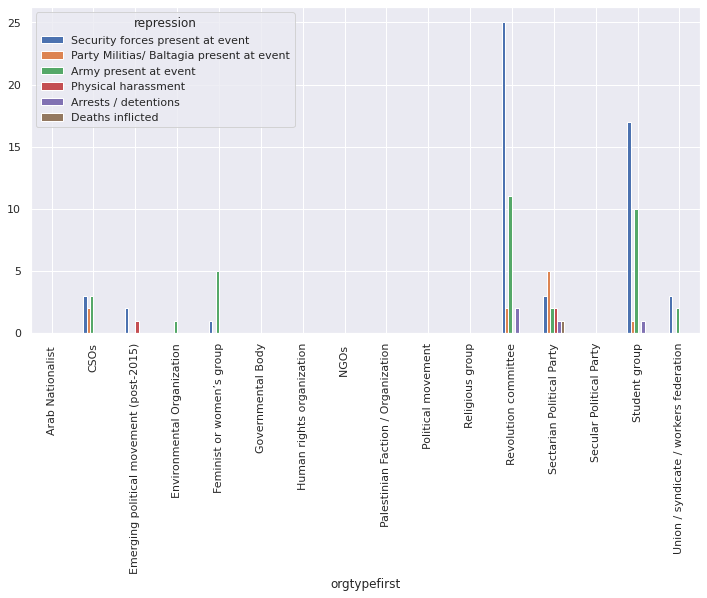

In [46]:
future_plot('orgtypefirst', drop_non_violence=True)
plt.savefig('../plots/leb_plots/demand_modified_repress.png')

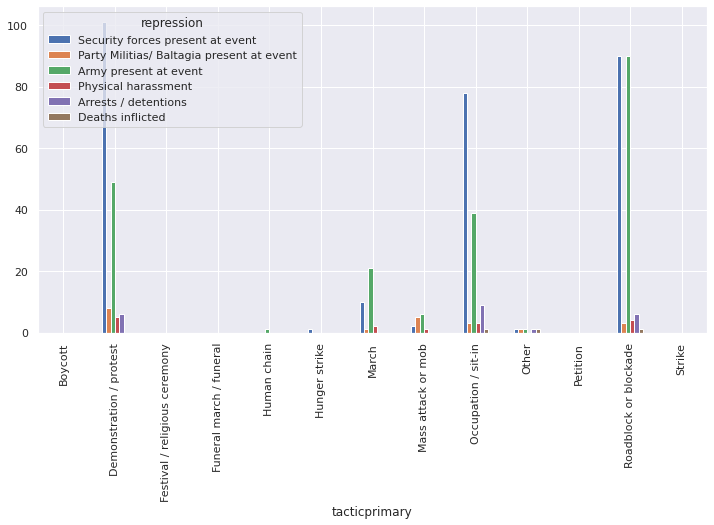

In [47]:
future_plot('tacticprimary', drop_non_violence=True)
plt.savefig('../plots/leb_plots/tactic_repress.png')

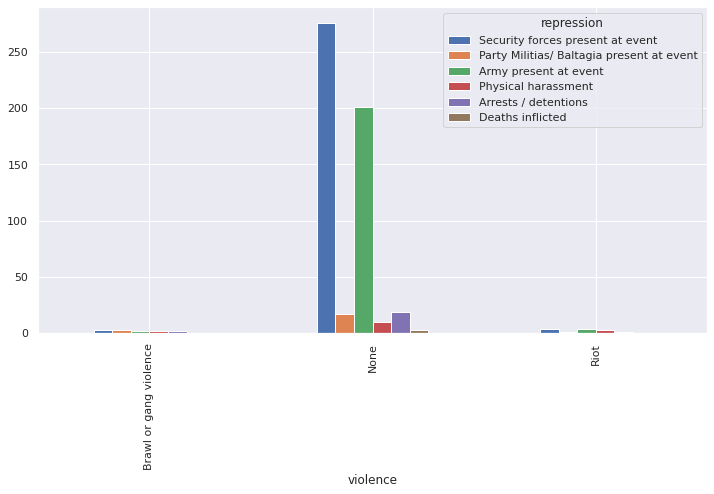

In [48]:
future_plot('violence', drop_non_violence=True)
plt.savefig('../plots/leb_plots/violence_repress.png')